# **Loading Data and Data pre-proccessing**

In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

In [102]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [103]:
path = '/content/drive/MyDrive/diabetes.csv'

In [104]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [105]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [107]:
data.shape

(768, 9)

In [108]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
type(data)

pandas.core.frame.DataFrame

Heatmap

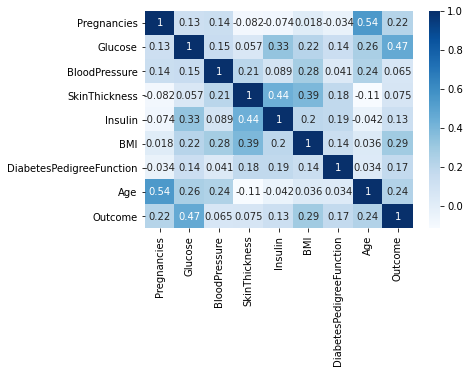

In [110]:
sns.heatmap(data.corr(), cmap = "Blues", annot = True)
plt.show()

In [111]:
Y = data.Outcome
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [112]:
X = data.drop('Outcome',axis = 1)

In [113]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [114]:
X.head()
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [115]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape, X_val.shape)
type(X_train)
type(X_val)

(614, 8) (154, 8)


pandas.core.frame.DataFrame

In [116]:
X_train = torch.tensor(X_train.values.astype(np.float32)) 
X_val = torch.tensor(X_val.values.astype(np.float32)) 

In [117]:
Y_train = torch.tensor(Y_train.values.astype(np.float32))
Y_val = torch.tensor(Y_val.values.astype(np.float32))

In [118]:
print(X_train.shape, Y_train.shape)

torch.Size([614, 8]) torch.Size([614])


# **Model Using NN.Sequential**

In [119]:
class FirstNetwork_1(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        
        nn.Linear(8, 4), 
        nn.Sigmoid(), 
        nn.Linear(4, 1), 
        nn.Sigmoid()
       
    )

  def forward(self, X):
    return self.net(X)

In [120]:
class FirstNetwork_2(nn.Module):
  
  def __init__(self):
    super().__init__()
   
    self.net = nn.Sequential(
        
        nn.Linear(8, 6), 
        nn.Sigmoid(),
        nn.Linear(6, 4), 
        nn.Sigmoid(),
        nn.Linear(4, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 1), 
        nn.Sigmoid()
        
    )

  def forward(self, X):
    return self.net(X)

In [121]:
from torch import optim

In [122]:
def fit_v1(epochs = 10000, learning_rate = 0.01):
  loss_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate,momentum = 0.01)
  loss_new = nn.MSELoss()
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    
    loss = loss_new(y_hat, Y_train)
    loss_arr.append(loss.item())
    

    loss.backward()
    opt.step()
    opt.zero_grad()
    
        
  plt.plot(loss_arr)
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])
 


FirstNetwork_2(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=2, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=2, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


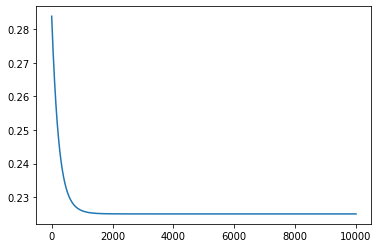

Loss before training 0.2838709056377411
Loss after training 0.22504231333732605
Time taken:  17.822050094604492


In [123]:
tic = time.time()
fn = FirstNetwork_2()
print(fn)
fit_v1()
toc = time.time()
print("Time taken: ",toc-tic)

In [124]:
def evaluation(input,label,model):
    correct = 0
    total = label.shape[0]

    output = model(input)
    for x,y in zip(output,label):
        if(x<0.5 and y==0):
            correct+=1
        elif(x>=0.5 and y==1):
            correct+=1

    return 100 * correct / total

In [125]:
print("Train accuracy:",evaluation(X_train,Y_train,fn))
print("Test accuracy :",evaluation(X_val,Y_val,fn))

Train accuracy: 65.79804560260587
Test accuracy : 62.33766233766234
